# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

      Datasest diambil dari kaggle : [Sumber Dataset](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.model_selection import ParameterGrid
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Data/StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Struktur data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
# Menangani data yang hilang
missing_values = df.isnull().sum()
print("Missing values before dropping rows:\n", missing_values[missing_values > 0])

# Drop rows with any missing values
df.dropna(inplace=True)

# Verify if missing values have been removed
missing_values_after_drop = df.isnull().sum()
print("\nMissing values after dropping rows:\n", missing_values_after_drop[missing_values_after_drop > 0])

Missing values before dropping rows:
 Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

Missing values after dropping rows:
 Series([], dtype: int64)


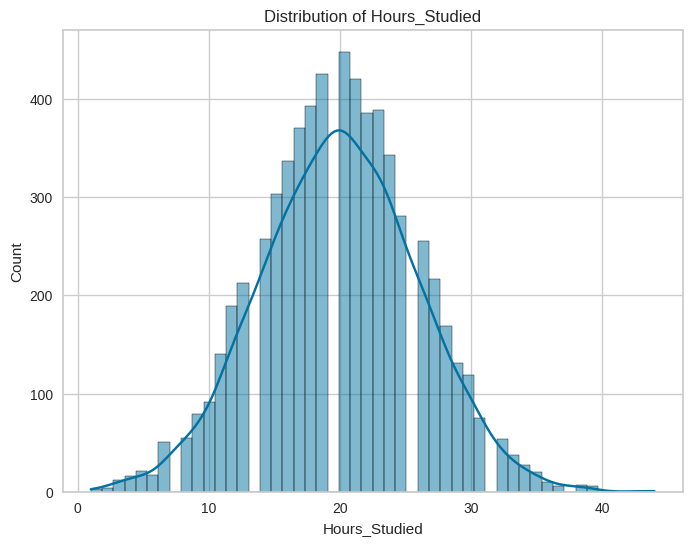

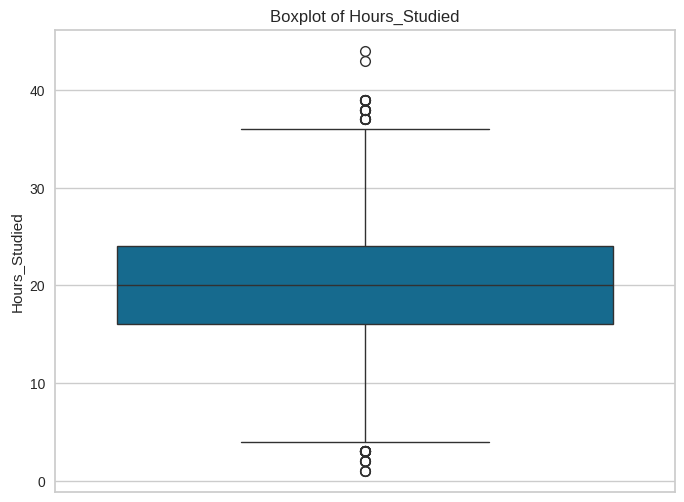

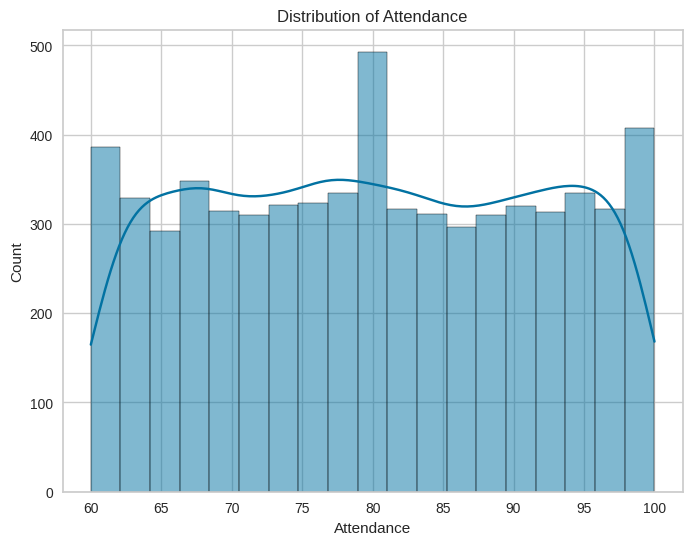

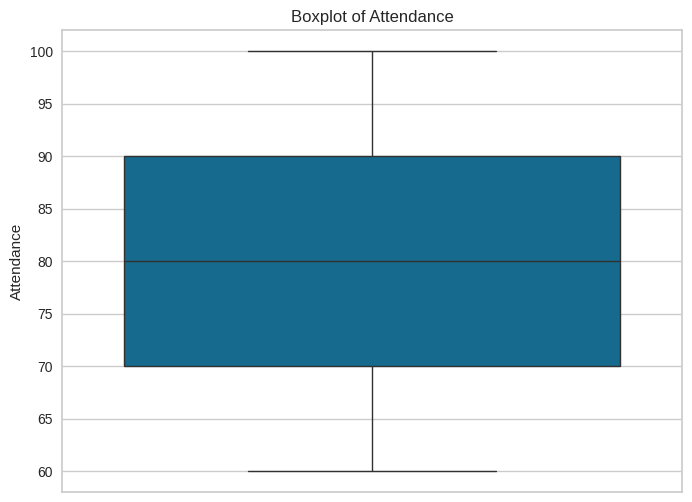

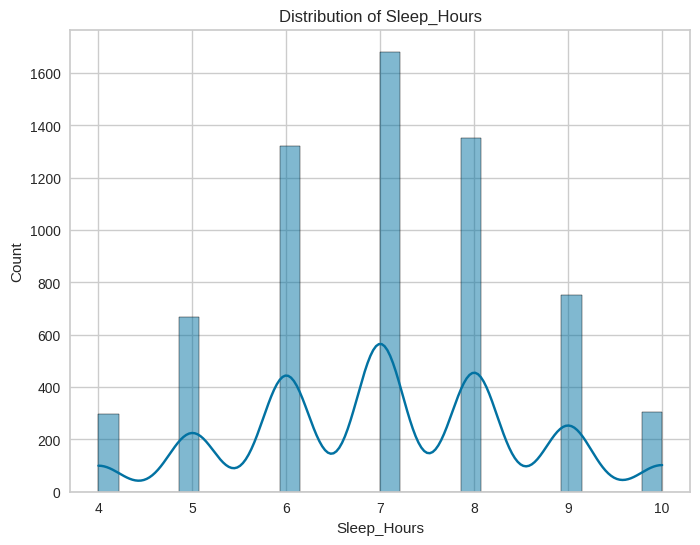

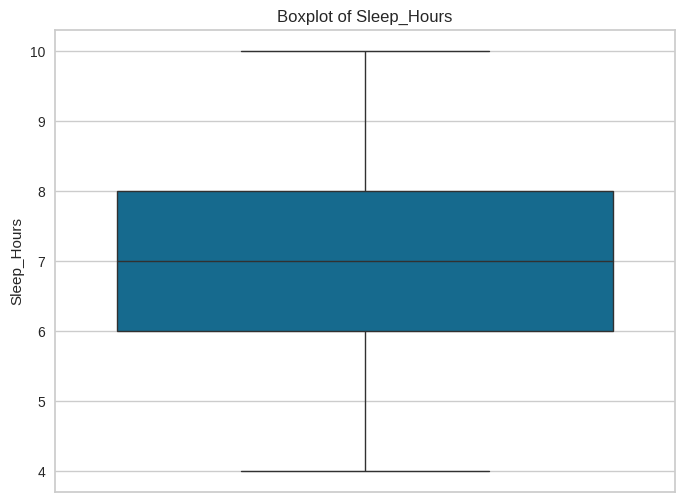

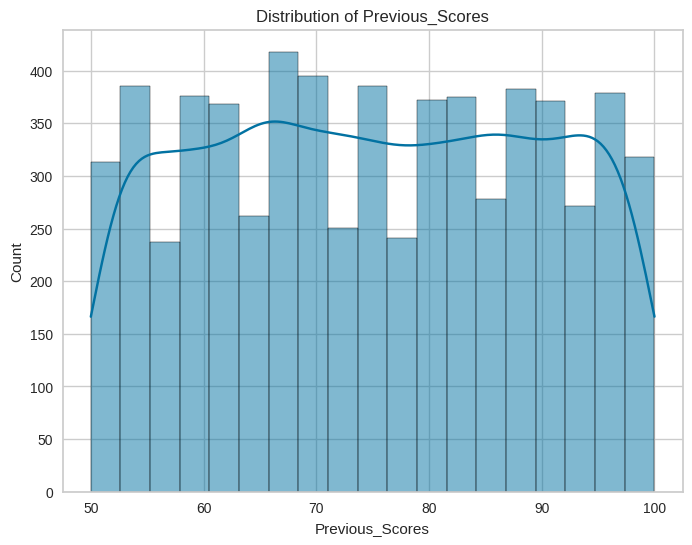

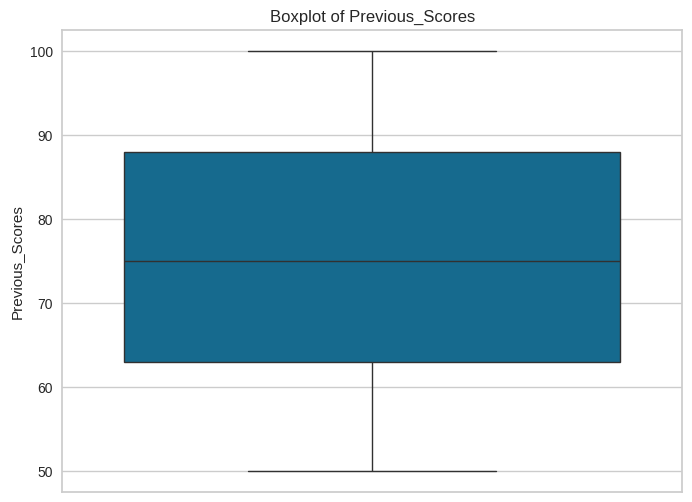

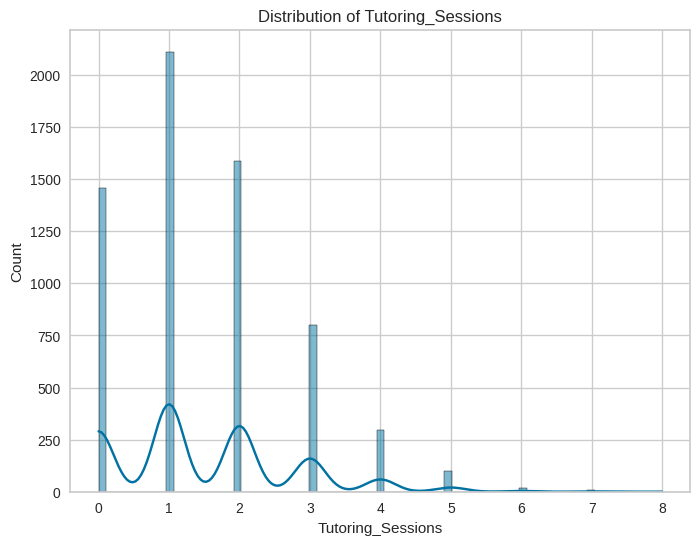

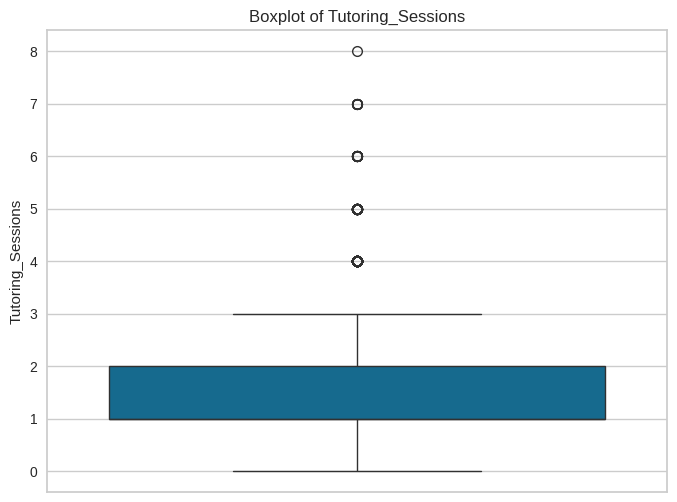

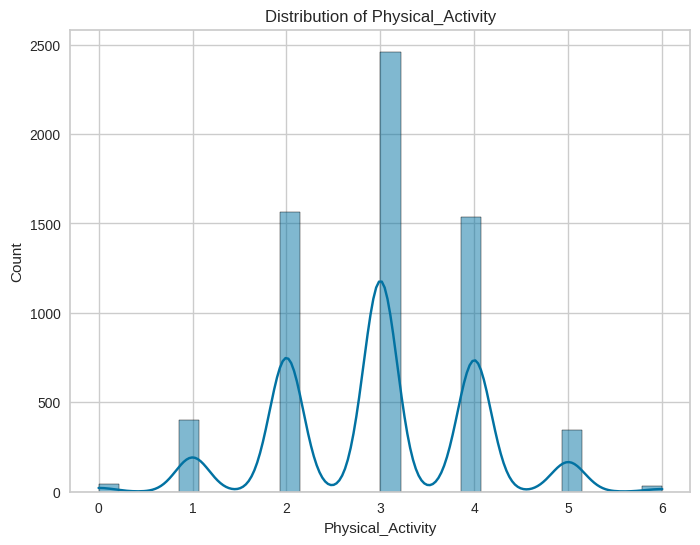

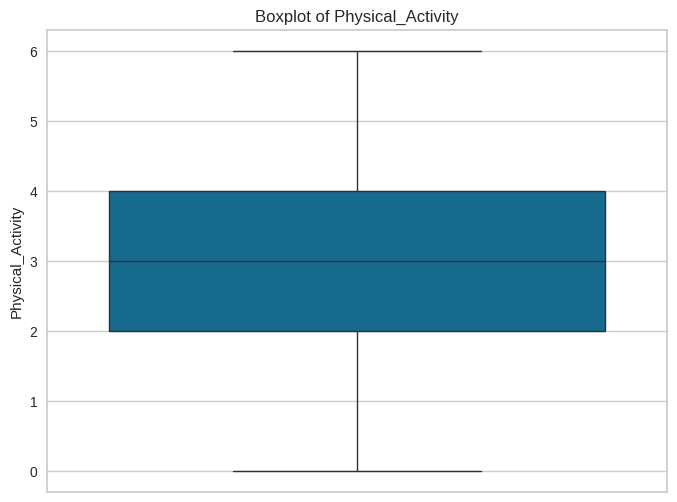

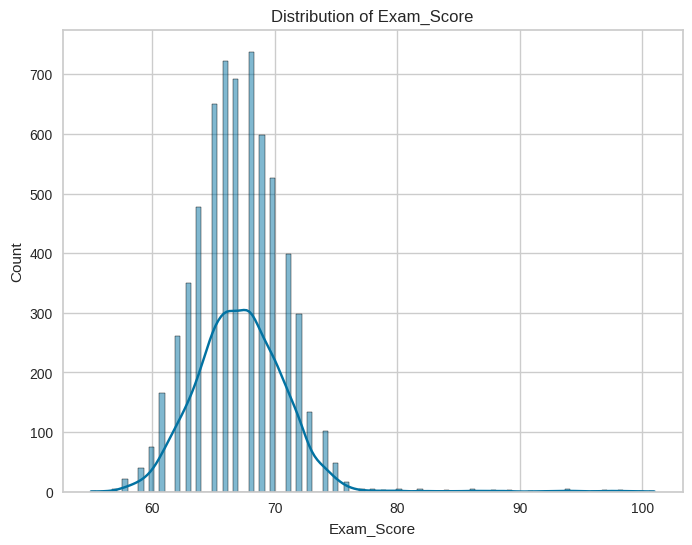

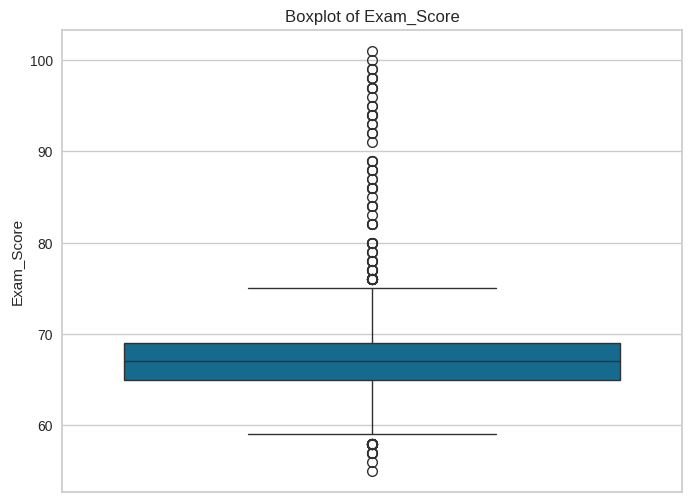

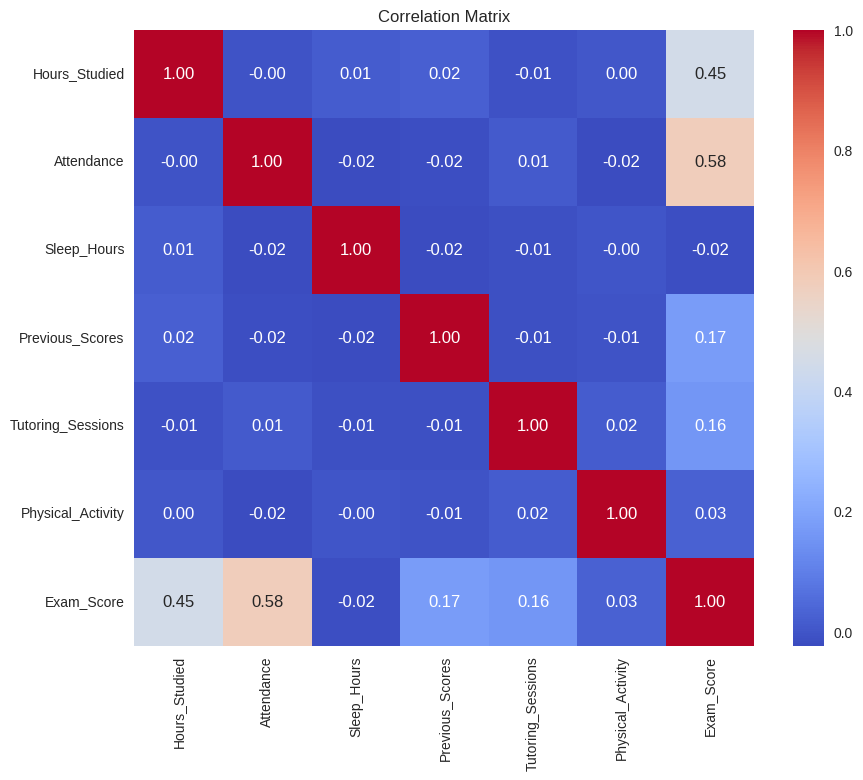

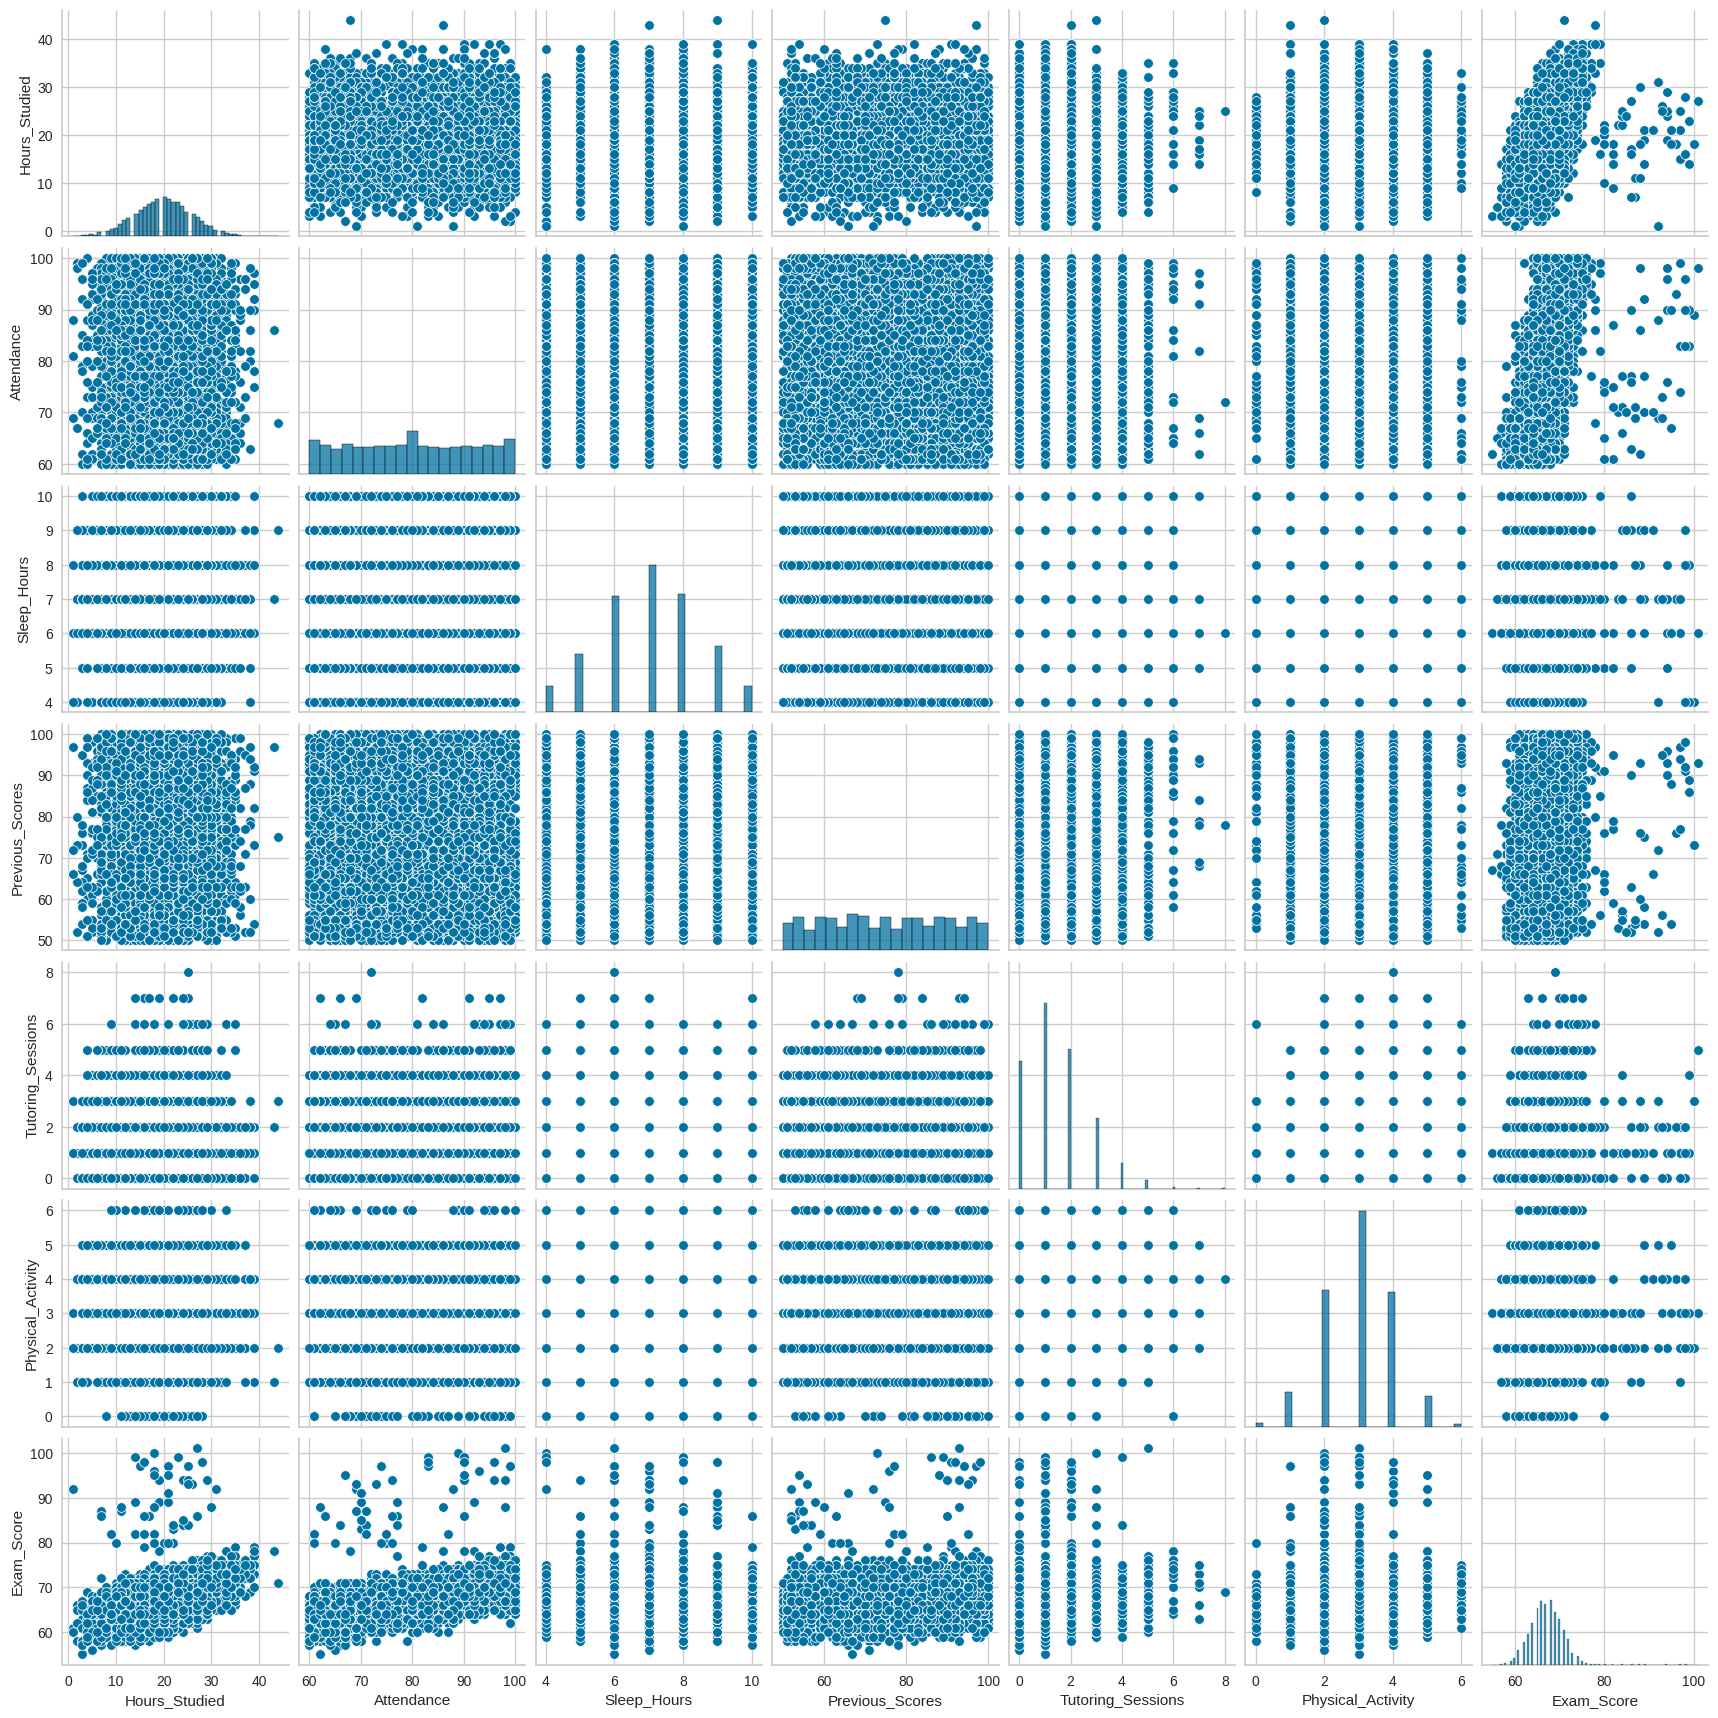

In [ ]:
# Analisis Distribusi dan Korelasi

# Analisis distribusi variabel numerik
numerical_features = df.select_dtypes(include=np.number)
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Matriks Korelasi
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot untuk beberapa pasang variabel
sns.pairplot(numerical_features)
plt.show()

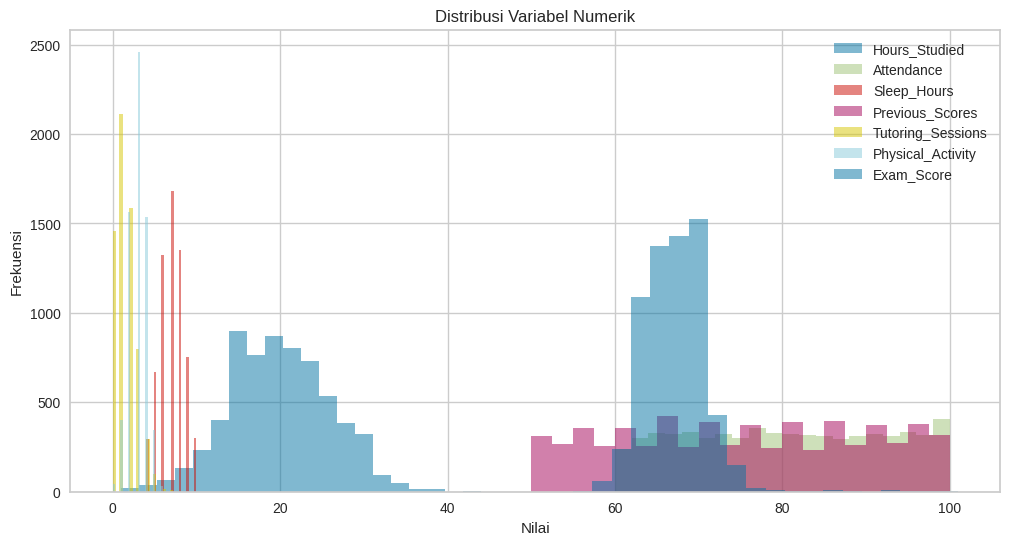

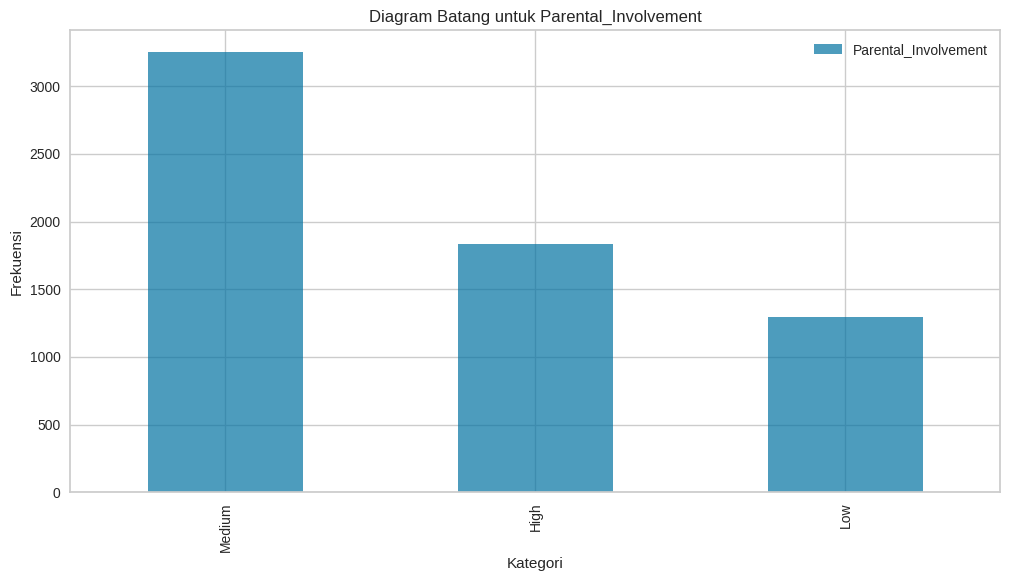

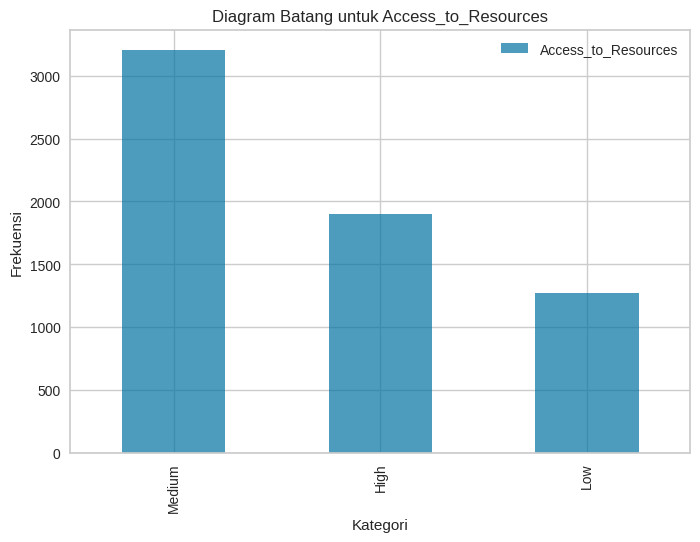

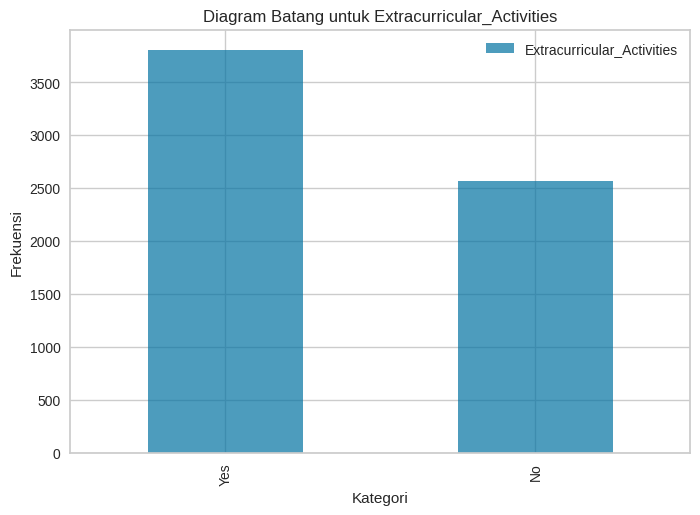

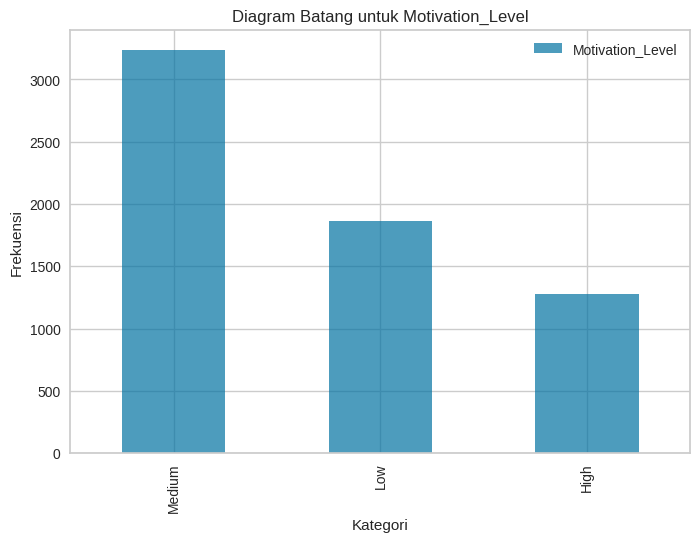

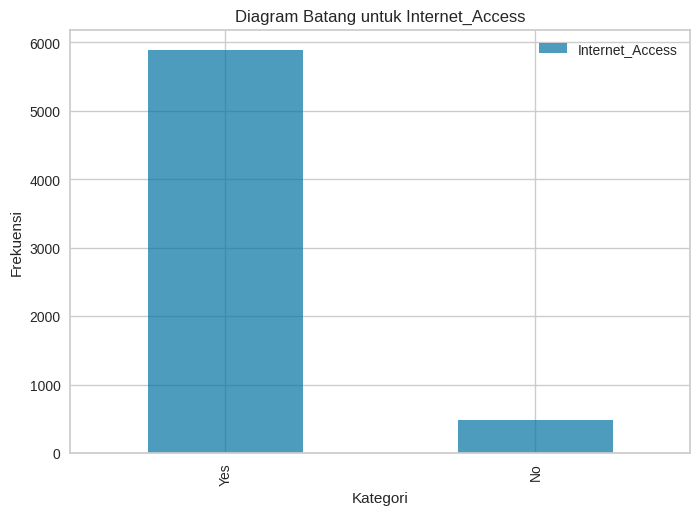

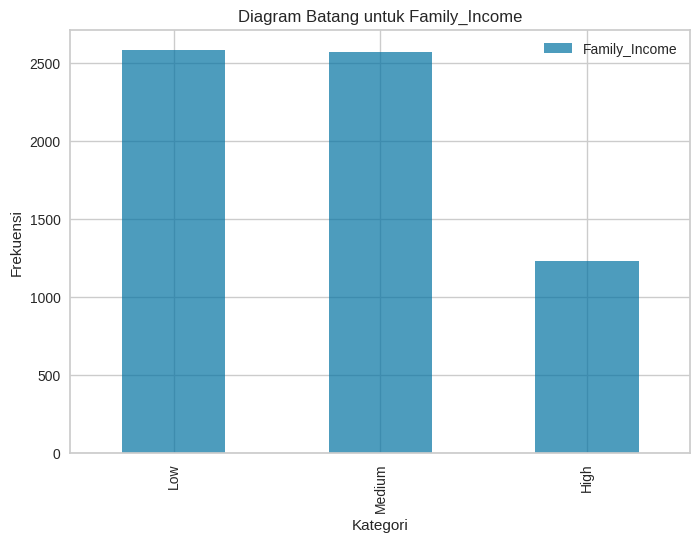

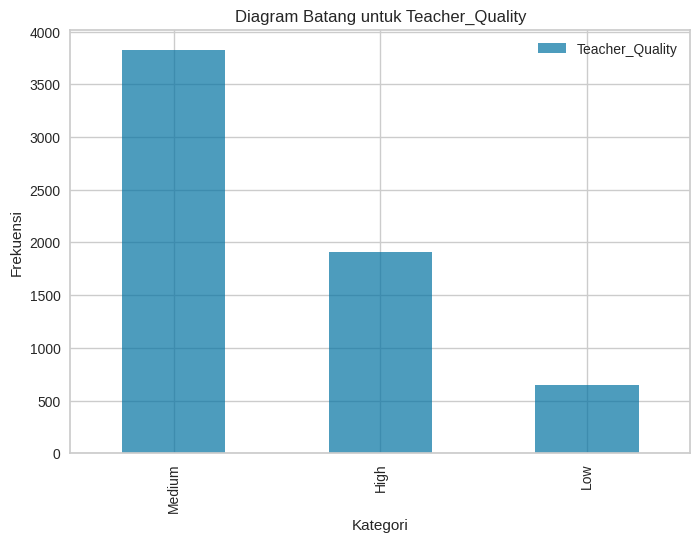

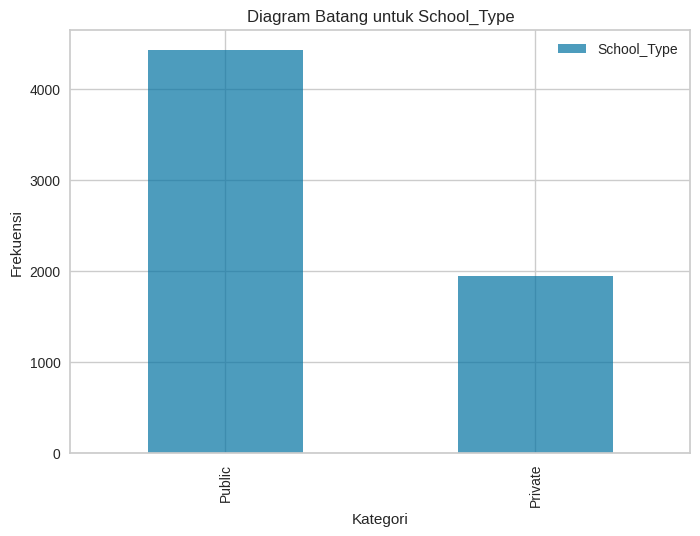

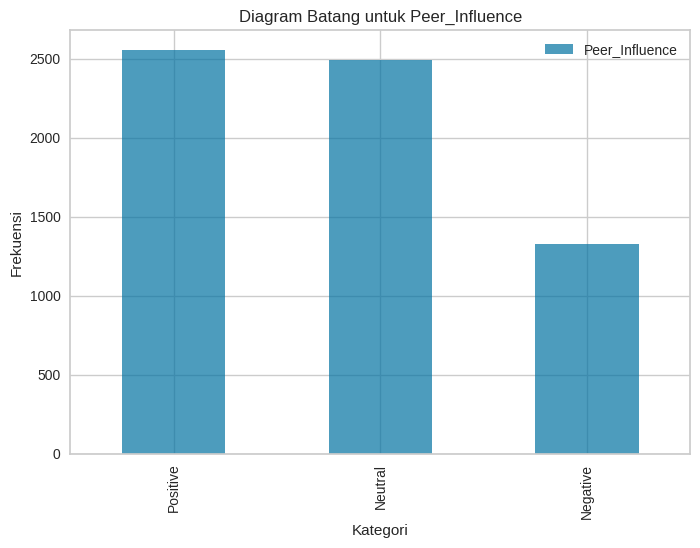

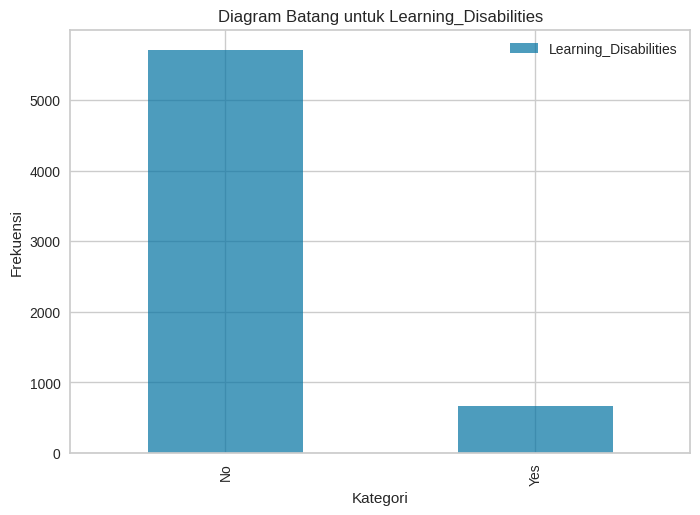

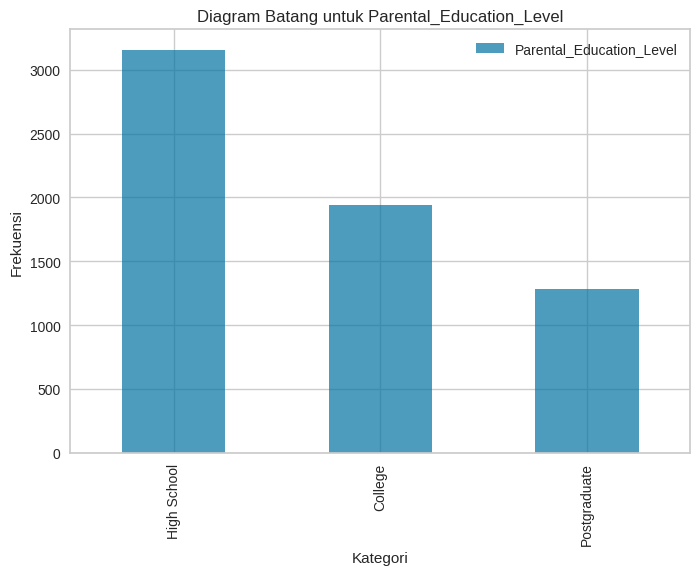

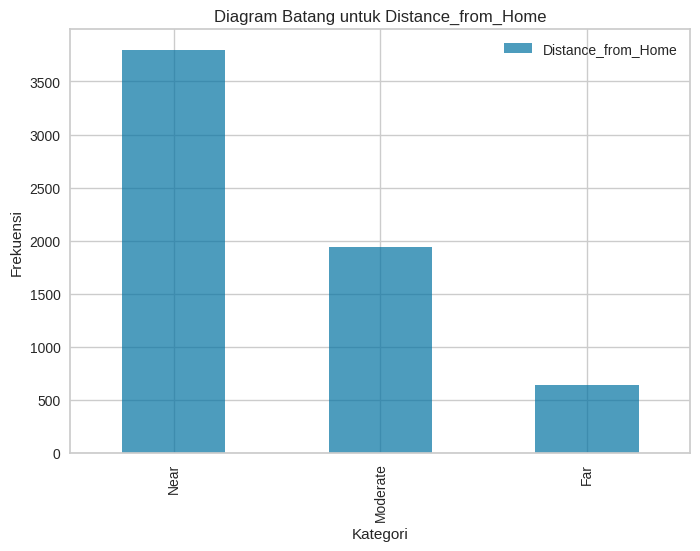

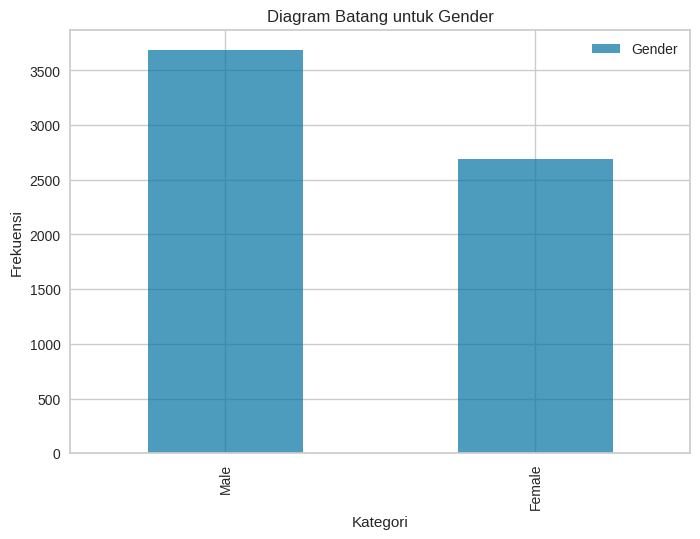

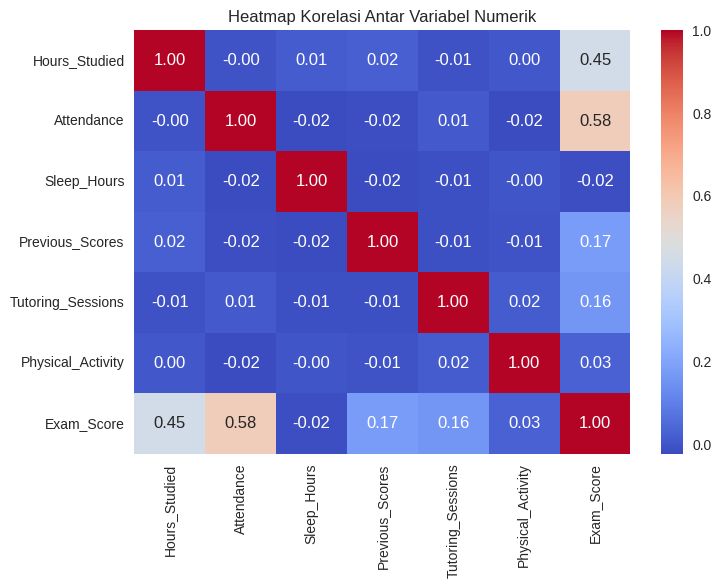

In [ ]:
# Visualisasi Data

# Visualisasi distribusi untuk variabel numerik
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=np.number):
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.title('Distribusi Variabel Numerik')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Diagram batang untuk variabel kategorikal
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include='object'):
    df[column].value_counts().plot(kind='bar', alpha=0.7, label=column)
    plt.title(f'Diagram Batang untuk {column}')
    plt.xlabel('Kategori')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.show()


# Heatmap untuk korelasi antar variabel numerik
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Encoding Categorical Features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Standardize Data
scaler = MinMaxScaler()
X_all = scaler.fit_transform(df)  # Semua fitur

In [ ]:
# Outlier Detection and Removal (IQR)
Q1 = np.percentile(X_all, 25, axis=0)
Q3 = np.percentile(X_all, 75, axis=0)
IQR = Q3 - Q1

outlier_indices = np.where((X_all < (Q1 - 1.5 * IQR)) | (X_all > (Q3 + 1.5 * IQR)))[0]
X_filtered = np.delete(X_all, outlier_indices, axis=0)

print(f"Jumlah outlier (IQR): {len(outlier_indices)}")

print(f"Jumlah outlier (Z-score): {len(outlier_indices)}")
X_filtered = np.delete(X_all, outlier_indices, axis=0)

Jumlah outlier (IQR): 1774
Jumlah outlier (Z-score): 1774


In [ ]:
# Dimensionality Reduction (PCA)
def apply_pca(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(data)

X_all_pca = apply_pca(X_all)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

--- Silhouette Scores with All Features ---


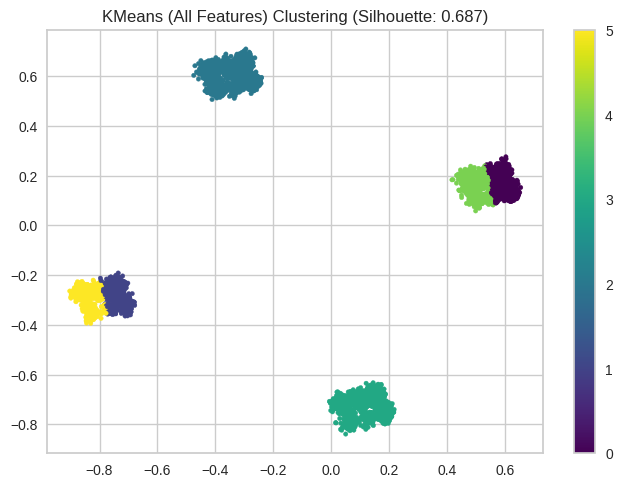

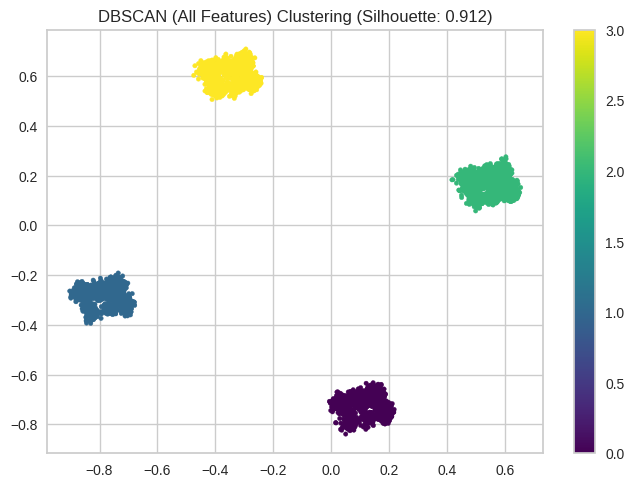

    Model  All Features
0  KMeans      0.687477
1  DBSCAN      0.911653


In [ ]:
# Clustering Models
def clustering_and_evaluate(X, model, name):
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'{name} Clustering (Silhouette: {silhouette:.3f})')
    plt.colorbar()
    plt.show()
    return silhouette

# Results
print('--- Silhouette Scores with All Features ---')
kmeans_all = clustering_and_evaluate(X_all_pca, KMeans(n_clusters=6, random_state=0), "KMeans (All Features)")
dbscan_all = clustering_and_evaluate(X_all_pca, DBSCAN(eps=0.5, min_samples=5), "DBSCAN (All Features)")

# Display Final Results
results = pd.DataFrame({
    'Model': ['KMeans', 'DBSCAN'],
    'All Features': [kmeans_all, dbscan_all],
})
print(results)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

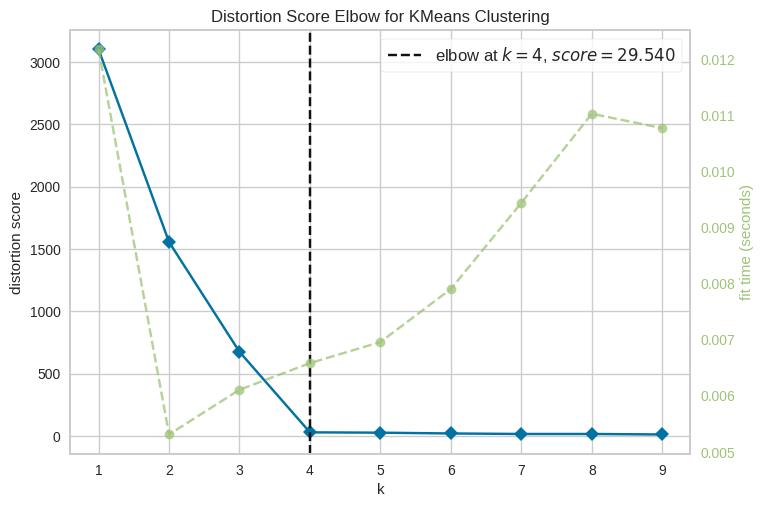

DBSCAN eps=0.1, Silhouette Score: 0.912
DBSCAN eps=0.2, Silhouette Score: 0.912
DBSCAN eps=0.3, Silhouette Score: 0.912
DBSCAN eps=0.4, Silhouette Score: 0.912
DBSCAN eps=0.5, Silhouette Score: 0.912
DBSCAN eps=0.6, Silhouette Score: 0.912


In [ ]:
# 1. KMeans Evaluation

# Elbow Method for KMeans
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_all_pca)
visualizer.show()


#2. DBSCAN Evaluation
for eps in np.arange(0.1, 0.7, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_all_pca)
    score = silhouette_score(X_all_pca, labels) if len(set(labels)) > 1 else -1
    print(f'DBSCAN eps={eps:.1f}, Silhouette Score: {score:.3f}')

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

--- Silhouette Scores with All Features ---


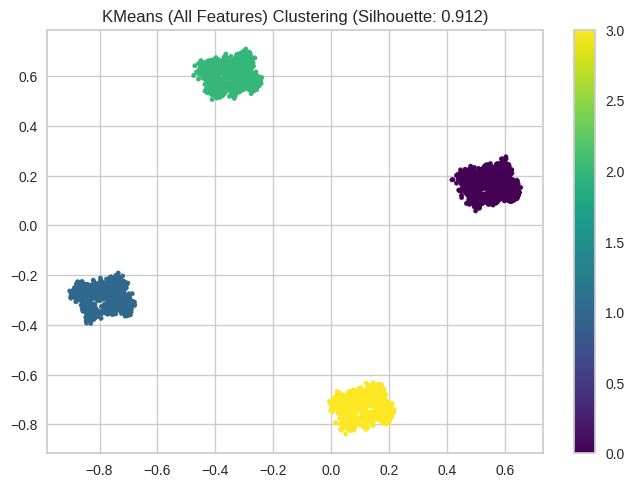

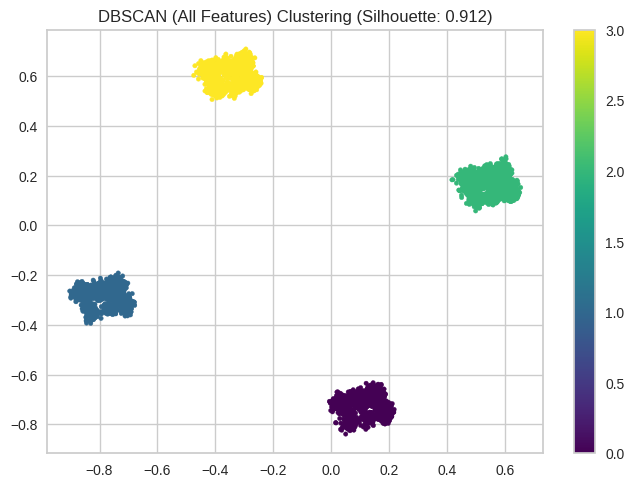

    Model  All Features
0  KMeans      0.911653
1  DBSCAN      0.911653


In [ ]:
# Clustering Models
def clustering_and_evaluate(X, model, name):
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'{name} Clustering (Silhouette: {silhouette:.3f})')
    plt.colorbar()
    plt.show()
    return silhouette, labels # Return labels as well

# Compare Results
print('--- Silhouette Scores with All Features ---')
kmeans_all, _ = clustering_and_evaluate(X_all_pca, KMeans(n_clusters=4, random_state=0), "KMeans (All Features)") # Ignore labels for KMeans
dbscan_all, _ = clustering_and_evaluate(X_all_pca, DBSCAN(eps=0.5, min_samples=5), "DBSCAN (All Features)") # Ignore labels for DBSCAN

# Display Final Results
results = pd.DataFrame({
    'Model': ['KMeans', 'DBSCAN'],
    'All Features': [kmeans_all, dbscan_all]
})
print(results)

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

# Pastikan Anda sudah melakukan scaling atau PCA pada data sebelum clustering
# Assume X_all_pca adalah hasil PCA atau data yang sudah di-scale

# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_all_pca)

# Tambahkan label cluster ke DataFrame
df['Cluster'] = dbscan_labels  # Langsung tambahkan hasil clustering ke dataset asli

# Filter outliers berdasarkan label cluster (-1 menunjukkan outliers dalam DBSCAN)
filtered_df = df[df['Cluster'] != -1]

# Group by cluster labels (kecuali outliers)
cluster_analysis = filtered_df.groupby('Cluster').agg({
    'Hours_Studied': ['mean', 'median'],
    'Attendance': ['mean', 'median'],
    'Sleep_Hours': ['mean', 'median'],
    'Previous_Scores': ['mean', 'median'],
    'Tutoring_Sessions': ['mean', 'median'],
    'Physical_Activity': ['mean', 'median'],
    'Exam_Score': ['mean', 'median'],
    'Parental_Involvement': lambda x: x.mode()[0],
    'Access_to_Resources': lambda x: x.mode()[0],
    'Motivation_Level': lambda x: x.mode()[0],
    'Family_Income': lambda x: x.mode()[0],
    'Teacher_Quality': lambda x: x.mode()[0]
}).reset_index()

# Rename columns for clarity
cluster_analysis.columns = [
    'Cluster',
    'Hours_Studied_Mean', 'Hours_Studied_Median',
    'Attendance_Mean', 'Attendance_Median',
    'Sleep_Hours_Mean', 'Sleep_Hours_Median',
    'Previous_Scores_Mean', 'Previous_Scores_Median',
    'Tutoring_Sessions_Mean', 'Tutoring_Sessions_Median',
    'Physical_Activity_Mean', 'Physical_Activity_Median',
    'Exam_Score_Mean', 'Exam_Score_Median',
    'Parental_Involvement_Mode', 'Access_to_Resources_Mode',
    'Motivation_Level_Mode', 'Family_Income_Mode', 'Teacher_Quality_Mode'
]

# Generate insights and interpretations for each cluster
for i, row in cluster_analysis.iterrows():
    print(f"Cluster {int(row['Cluster'])}:")
    print(f"- Rata-rata Hours Studied: {row['Hours_Studied_Mean']:.2f}")
    print(f"- Median Hours Studied: {row['Hours_Studied_Median']:.2f}")
    print(f"- Rata-rata Attendance: {row['Attendance_Mean']:.2f}")
    print(f"- Median Attendance: {row['Attendance_Median']:.2f}")
    print(f"- Rata-rata Sleep Hours: {row['Sleep_Hours_Mean']:.2f}")
    print(f"- Median Sleep Hours: {row['Sleep_Hours_Median']:.2f}")
    print(f"- Rata-rata Exam Score: {row['Exam_Score_Mean']:.2f}")
    print(f"- Median Exam Score: {row['Exam_Score_Median']:.2f}")
    print(f"- Parental Involvement (Mode): {row['Parental_Involvement_Mode']}")
    print(f"- Access to Resources (Mode): {row['Access_to_Resources_Mode']}")
    print(f"- Motivation Level (Mode): {row['Motivation_Level_Mode']}")
    print(f"- Family Income (Mode): {row['Family_Income_Mode']}")
    print(f"- Teacher Quality (Mode): {row['Teacher_Quality_Mode']}")
    print("\n")


Cluster 0:
- Rata-rata Hours Studied: 19.93
- Median Hours Studied: 20.00
- Rata-rata Attendance: 80.16
- Median Attendance: 81.00
- Rata-rata Sleep Hours: 7.00
- Median Sleep Hours: 7.00
- Rata-rata Exam Score: 66.99
- Median Exam Score: 67.00
- Parental Involvement (Mode): 2.0
- Access to Resources (Mode): 2.0
- Motivation Level (Mode): 2.0
- Family Income (Mode): 2.0
- Teacher Quality (Mode): 2.0


Cluster 1:
- Rata-rata Hours Studied: 20.18
- Median Hours Studied: 20.00
- Rata-rata Attendance: 79.89
- Median Attendance: 80.00
- Rata-rata Sleep Hours: 7.07
- Median Sleep Hours: 7.00
- Rata-rata Exam Score: 66.90
- Median Exam Score: 67.00
- Parental Involvement (Mode): 2.0
- Access to Resources (Mode): 2.0
- Motivation Level (Mode): 2.0
- Family Income (Mode): 1.0
- Teacher Quality (Mode): 2.0


Cluster 2:
- Rata-rata Hours Studied: 19.95
- Median Hours Studied: 20.00
- Rata-rata Attendance: 80.00
- Median Attendance: 79.00
- Rata-rata Sleep Hours: 7.04
- Median Sleep Hours: 7.00
- 

Distribusi Cluster:
Cluster Label
Siswa dengan Fokus Akademik dan Dukungan Keluarga Rendah        1685
Siswa Konsisten dengan Dukungan Keluarga dan Lingkungan Baik    1198
Siswa dengan Keseimbangan Belajar dan Dukungan Moderat          1121
Siswa Berprestasi di Tengah Keterbatasan Ekonomi                 804
Name: count, dtype: int64


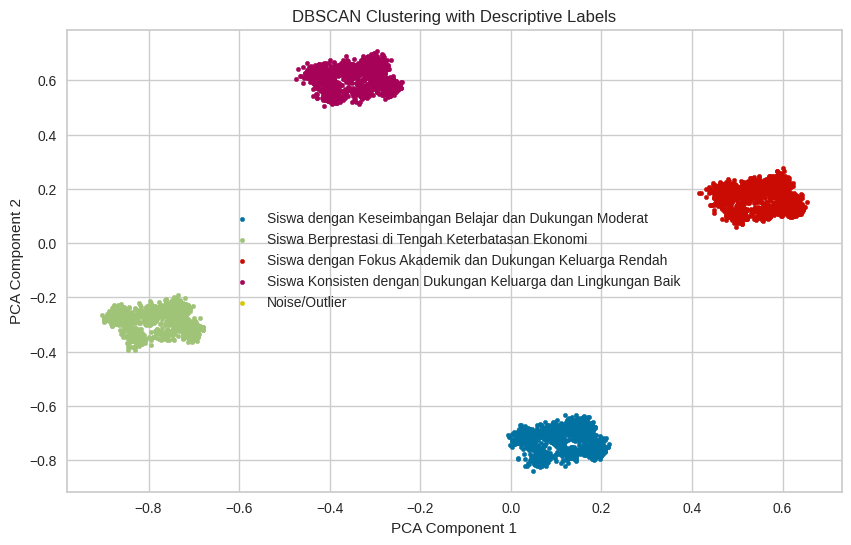

In [ ]:
# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_all_pca)

# Tambahkan label cluster ke DataFrame
df['Cluster'] = dbscan_labels  # Langsung tambahkan hasil clustering ke dataset asli

# Filter outliers berdasarkan label cluster (-1 menunjukkan outliers dalam DBSCAN)
filtered_df = df[df['Cluster'] != -1]


# Berikan Label Deskriptif untuk Setiap Cluster
# Pastikan label ini sesuai dengan analisis karakteristik cluster Anda
cluster_labels = {
    0: "Siswa dengan Keseimbangan Belajar dan Dukungan Moderat",
    1: "Siswa Berprestasi di Tengah Keterbatasan Ekonomi",
    2: "Siswa dengan Fokus Akademik dan Dukungan Keluarga Rendah",
    3: "Siswa Konsisten dengan Dukungan Keluarga dan Lingkungan Baik",
    -1: "Noise/Outlier"  # Label default untuk noise (outlier)
}

# Tambahkan kolom label deskriptif ke DataFrame using .loc
df.loc[filtered_indices, 'Cluster Label'] = df.loc[filtered_indices, 'Cluster'].map(cluster_labels)

# Tampilkan Distribusi Cluster
print("Distribusi Cluster:")
print(df['Cluster Label'].value_counts())

# Visualisasi Hasil Clustering dengan Label
plt.figure(figsize=(10, 6))
for cluster, label in cluster_labels.items():
    cluster_data = X_all_pca[dbscan_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=label, s=10)

plt.title("DBSCAN Clustering with Descriptive Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

**Judul Project**:  
**"Analisis Cluster Kebiasaan Belajar dan Faktor Pendukung Prestasi Siswa Menggunakan DBSCAN Clustering"**  

**Deskripsi Project**:  
Project ini bertujuan untuk mengidentifikasi pola kebiasaan belajar siswa dan faktor pendukung yang memengaruhi prestasi akademik. Dengan menggunakan clustering, siswa dikelompokkan berdasarkan variabel seperti jam belajar, kehadiran, durasi tidur, dan skor ujian, serta faktor pendukung seperti keterlibatan orang tua, akses sumber daya, tingkat motivasi, pendapatan keluarga, dan kualitas pengajaran.  

---  

### **Cluster 0: "Siswa dengan Keseimbangan Belajar dan Dukungan Moderat"**  
- **Rata-rata Hours Studied**: 19.93  
- **Median Hours Studied**: 20.00  
- **Rata-rata Attendance**: 80.16  
- **Median Attendance**: 81.00  
- **Rata-rata Sleep Hours**: 7.00  
- **Median Sleep Hours**: 7.00  
- **Rata-rata Exam Score**: 66.99  
- **Median Exam Score**: 67.00  
- **Parental Involvement (Mode)**: 2.0 (Sedang)  
- **Access to Resources (Mode)**: 2.0 (Sedang)  
- **Motivation Level (Mode)**: 2.0 (Sedang)  
- **Family Income (Mode)**: 2.0 (Sedang)  
- **Teacher Quality (Mode)**: 2.0 (Sedang)  

**Deskripsi**:  
Cluster ini merepresentasikan siswa dengan kebiasaan belajar yang stabil. Jam belajar, kehadiran, dan durasi tidur berada pada tingkat moderat. Dukungan orang tua, motivasi, dan akses sumber daya juga berada dalam kategori sedang, menunjukkan lingkungan belajar yang cukup mendukung tanpa tekanan yang berlebihan. Siswa dalam cluster ini cenderung memiliki performa akademik yang konsisten dengan skor ujian yang mendekati rata-rata.  

---  

### **Cluster 1: "Siswa Berprestasi di Tengah Keterbatasan Ekonomi"**  
- **Rata-rata Hours Studied**: 20.18  
- **Median Hours Studied**: 20.00  
- **Rata-rata Attendance**: 79.89  
- **Median Attendance**: 80.00  
- **Rata-rata Sleep Hours**: 7.07  
- **Median Sleep Hours**: 7.00  
- **Rata-rata Exam Score**: 66.90  
- **Median Exam Score**: 67.00  
- **Parental Involvement (Mode)**: 2.0 (Sedang)  
- **Access to Resources (Mode)**: 2.0 (Sedang)  
- **Motivation Level (Mode)**: 2.0 (Sedang)  
- **Family Income (Mode)**: 1.0 (Rendah)  
- **Teacher Quality (Mode)**: 2.0 (Sedang)  

**Deskripsi**:  
Siswa dalam cluster ini memiliki pola belajar dan kehadiran yang mirip dengan cluster lainnya, namun dengan keterbatasan ekonomi (family income rendah). Meskipun begitu, mereka tetap memiliki tingkat motivasi dan keterlibatan orang tua yang sedang. Hal ini menunjukkan bahwa keterbatasan finansial tidak selalu menghambat prestasi akademik, tetapi mungkin mempengaruhi akses terhadap sumber belajar tambahan.  

---  

### **Cluster 2: "Siswa dengan Fokus Akademik dan Dukungan Keluarga Rendah"**  
- **Rata-rata Hours Studied**: 19.95  
- **Median Hours Studied**: 20.00  
- **Rata-rata Attendance**: 80.00  
- **Median Attendance**: 79.00  
- **Rata-rata Sleep Hours**: 7.04  
- **Median Sleep Hours**: 7.00  
- **Rata-rata Exam Score**: 67.40  
- **Median Exam Score**: 67.00  
- **Parental Involvement (Mode)**: 2.0 (Sedang)  
- **Access to Resources (Mode)**: 2.0 (Sedang)  
- **Motivation Level (Mode)**: 2.0 (Sedang)  
- **Family Income (Mode)**: 1.0 (Rendah)  
- **Teacher Quality (Mode)**: 2.0 (Sedang)  

**Deskripsi**:  
Cluster ini mencakup siswa yang memiliki fokus akademik cukup tinggi, dengan jam belajar dan kehadiran yang stabil. Namun, mereka berasal dari latar belakang ekonomi rendah dan memiliki keterlibatan orang tua yang tidak terlalu intens. Meskipun demikian, skor ujian mereka menunjukkan hasil yang sedikit lebih baik dibandingkan cluster lainnya. Hal ini mungkin disebabkan oleh faktor internal seperti disiplin pribadi dan motivasi intrinsik.  

---  

### **Cluster 3: "Siswa Konsisten dengan Dukungan Keluarga dan Lingkungan Baik"**  
- **Rata-rata Hours Studied**: 19.92  
- **Median Hours Studied**: 20.00  
- **Rata-rata Attendance**: 80.01  
- **Median Attendance**: 80.00  
- **Rata-rata Sleep Hours**: 7.04  
- **Median Sleep Hours**: 7.00  
- **Rata-rata Exam Score**: 67.53  
- **Median Exam Score**: 67.00  
- **Parental Involvement (Mode)**: 2.0 (Sedang)  
- **Access to Resources (Mode)**: 2.0 (Sedang)  
- **Motivation Level (Mode)**: 2.0 (Sedang)  
- **Family Income (Mode)**: 2.0 (Sedang)  
- **Teacher Quality (Mode)**: 2.0 (Sedang)  

**Deskripsi**:  
Siswa dalam cluster ini menunjukkan keseimbangan dalam hampir semua faktor. Mereka memiliki jam belajar dan kehadiran yang stabil, serta dukungan lingkungan yang baik (pendapatan keluarga dan keterlibatan orang tua dalam tingkat sedang). Skor ujian yang dihasilkan juga cenderung lebih tinggi, mencerminkan konsistensi dan lingkungan belajar yang kondusif.  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Save Results to CSV (Data Asli dengan Cluster Labels)
# Menyimpan data asli dengan kolom 'Cluster' dan 'Cluster Label'
df_original_with_labels = df.copy()  # Menyimpan data asli yang sudah diberi label cluster
df_original_with_labels.to_csv('/content/drive/MyDrive/Data/Student_Performance_Factors_with_Cluster_Labels_Original.csv', index=False)

# Save Scaled Data with Cluster Labels (Jika diperlukan untuk data terstandarisasi)
df_scaled_with_labels = df.copy()  # Menyimpan data setelah skala dan encoding dengan cluster label
df_scaled_with_labels.to_csv('/content/drive/MyDrive/Data/Student_Performance_Factors_with_Cluster_Labels_Scaled.csv', index=False)

print("Data asli dengan label dan data terstandarisasi dengan label telah disimpan dalam file CSV.")

Data asli dengan label dan data terstandarisasi dengan label telah disimpan dalam file CSV.
